#Name: Amal Oueslati
Data science & Business Analytics Internship

Task-2: Prediction using Unsupervised Machine Learning

Predict the optimum number of clusters and represent it visually

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline


import warnings as wg
wg.filterwarnings("ignore")


In [ ]:
df=pd.read_csv('Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#Visualising the Data

In [ ]:
df.shape

(150, 6)

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df=df.drop(columns=['Species','Id'])

In [ ]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#Using the Elbow Method to find the optimum number of clusters

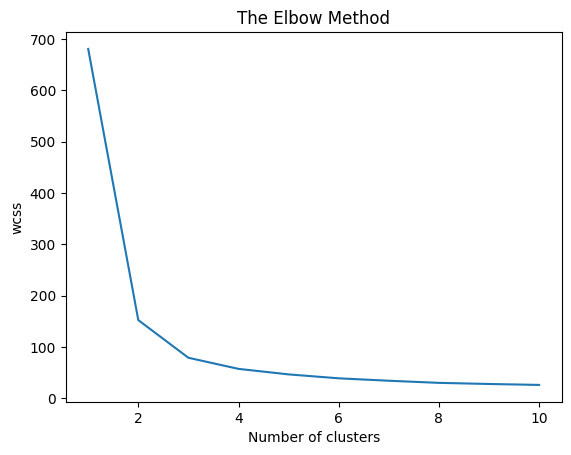

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(iris_df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

The plot shows 3 as the optimum number of clusters (last number before the line becomes constant)

In [ ]:
#Let's apply
kmeans=KMeans(n_clusters=3,
              init='k-means++',
              max_iter=300,
              n_init=10,
              random_state=0)


In [ ]:
y_pred=kmeans.fit_predict(iris_df)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

#Visualising The Clusters

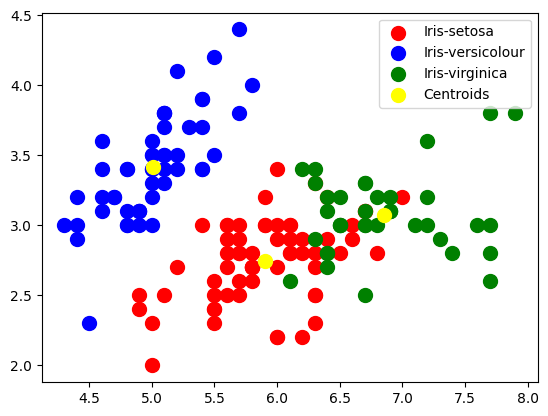

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(iris_df.loc[y_pred == 0, 'SepalLengthCm'], iris_df.loc[y_pred == 0, 'SepalWidthCm'],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(iris_df.loc[y_pred == 1, 'SepalLengthCm'], iris_df.loc[y_pred == 1, 'SepalWidthCm'],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(iris_df.loc[y_pred == 2, 'SepalLengthCm'], iris_df.loc[y_pred == 2, 'SepalWidthCm'],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()


In [ ]:
#Creating Boolean Masks:
#A boolean mask is an array of boolean values (True/False) with the same length as the DataFrame.
#Each element in the boolean mask corresponds to a row in the DataFrame.
#True indicates that the corresponding row satisfies the condition, and False indicates it does not.
#For example, y_pred == 0 creates a boolean mask where True represents the rows assigned to cluster 0 and False represents the rows not assigned to cluster 0.

#Applying Boolean Indexing:
#Using boolean mask it  select specific rows from the DataFrame.
#When you pass a boolean mask to the DataFrame using square brackets ([]), it returns a DataFrame containing only the rows where the mask is True.
#For example, iris_df[y_pred == 0] returns a DataFrame containing only the rows assigned to cluster 0.


#Accessing Specific Columns:
#combining boolean masks with column labels to filter specific columns of interest.
#For example, iris_df[y_pred == 0, 'SepalLengthCm'] returns the values of the 'SepalLengthCm' column for the rows assigned to cluster 0.

In [ ]:
# Confirming the type of iris_df
print(type(iris_df))

# Getting the column names of iris_df
print(iris_df.columns)


<class 'pandas.core.frame.DataFrame'>
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
